Ch25
# 可视化正定性
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, expand, simplify

# 定义可视化函数
def visualize(xx1,xx2,f2_array):
    
    fig = plt.figure(figsize=(6,3))
    # 左子图，三维
    ax_3D = fig.add_subplot(1, 2, 1, projection='3d')

    ax_3D.plot_wireframe(xx1, xx2, f2_array, 
                         rstride=10, cstride=10,
                         color = [0.8,0.8,0.8],
                         linewidth = 0.25)

    ax_3D.contour(xx1, xx2, f2_array, 
                  levels = 12, cmap = 'RdYlBu_r')

    ax_3D.set_xlabel('$x_1$'); ax_3D.set_ylabel('$x_2$')
    ax_3D.set_zlabel('$f(x_1,x_2)$')
    ax_3D.set_proj_type('ortho')
    ax_3D.set_xticks([]); ax_3D.set_yticks([])
    ax_3D.set_zticks([])
    ax_3D.view_init(azim=-120, elev=30)
    ax_3D.grid(False)
    ax_3D.set_xlim(xx1.min(), xx1.max()); 
    ax_3D.set_ylim(xx2.min(), xx2.max())
    
    # 右子图，平面等高线
    ax_2D = fig.add_subplot(1, 2, 2)
    ax_2D.contour(xx1, xx2, f2_array, 
                  levels = 12, cmap = 'RdYlBu_r')

    ax_2D.set_xlabel('$x_1$'); ax_2D.set_ylabel('$x_2$')
    ax_2D.set_xticks([]); ax_2D.set_yticks([])
    ax_2D.set_aspect('equal'); ax_2D.grid(False)
    ax_2D.set_xlim(xx1.min(), xx1.max()); 
    ax_2D.set_ylim(xx2.min(), xx2.max())
    plt.tight_layout()

2*x1*x2


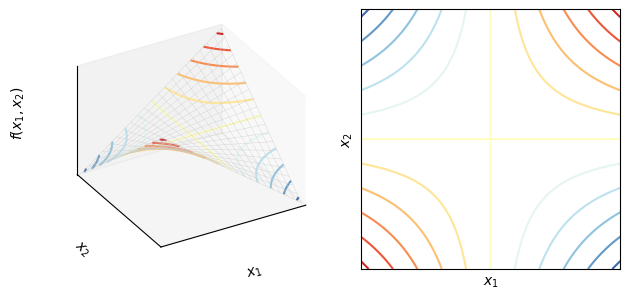

In [2]:
# 生成数据
x1_array = np.linspace(-2,2,201)
x2_array = np.linspace(-2,2,201)

xx1, xx2 = np.meshgrid(x1_array, x2_array)

# 定义二元函数

def fcn(A, xx1, xx2):

    x1,x2 = symbols('x1 x2')
    x = np.array([[x1,x2]]).T
    f_x = x.T@A@x
    f_x = f_x[0][0]
    print(simplify(expand(f_x)))

    f_x_fcn = lambdify([x1,x2],f_x)
    ff_x = f_x_fcn(xx1,xx2)
    
    return ff_x
    
# 不定矩阵
A = np.array([[0, 1],
              [1, 0]])

f2_array = fcn(A, xx1, xx2)
visualize(xx1,xx2,f2_array)